In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df_final = pd.read_csv('df_final.csv')

In [3]:
df_final.head()

,10,100,1000,10000,10k,10th,11,11th,12,12th,...,yr.1,zealand.1,zero.1,zombi.1,zone.1,similarity,is_duplicate,intersection_q1_q2_token_count,perc_count_min,perc_count_max
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.750000,0,7,0.875000,0.875000
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.500000,0,2,0.285714,0.181818
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.000000,0,2,0.285714,0.095238
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.000000,0,0,0.000000,0.000000
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.516398,1,5,0.714286,0.454545


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
X= df_final.drop(['is_duplicate','intersection_q1_q2_token_count'],axis=1)
y= df_final['is_duplicate']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [7]:
!pip install imblearn

     ---------------------------------------- 0.0/226.0 kB ? eta -:--:--
     ------------------------------------  225.3/226.0 kB 14.3 MB/s eta 0:00:01
     ------------------------------------  225.3/226.0 kB 14.3 MB/s eta 0:00:01
     -------------------------------------- 226.0/226.0 kB 2.8 MB/s eta 0:00:00


In [8]:
# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state=42)
# X_res,y_res=sm.fit_resample(X_train,y_train)

In [9]:
model = LogisticRegression()
model.fit(X_train,y_train)

# # Calculate the training accuracy
train_accuracy = model.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# # Calculate the testing accuracy
test_accuracy = model.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)

c:\Users\asmaa\anaconda3\envs\test_env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy: 0.8301587963155921
Testing Accuracy: 0.744790798466411


Classification Report (Default Threshold):
              precision    recall  f1-score   support

           0       0.78      0.82      0.80      3784
           1       0.67      0.61      0.64      2215

    accuracy                           0.74      5999
   macro avg       0.73      0.72      0.72      5999
weighted avg       0.74      0.74      0.74      5999



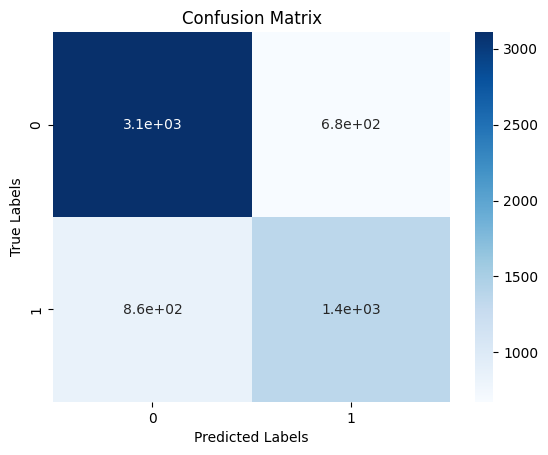

In [10]:
# Make predictions on the testing data
y_pred = model.predict(X_test)
#Classification Report
print("Classification Report (Default Threshold):")
print(classification_report(y_test, y_pred))
# Plot the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [11]:
!pip install xgboost

In [12]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)

# Calculate the training accuracy
train_accuracy = model.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calculate the testing accuracy
test_accuracy = model.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.8015254449214354
Testing Accuracy: 0.7554592432072011


In [13]:
# from imblearn.over_sampling import RandomOverSampler
# ros = RandomOverSampler(random_state=42)
# X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [14]:
# from imblearn.over_sampling import ADASYN
# # Apply ADASYN
# adasyn = ADASYN(random_state=42)
# X_res, y_res = adasyn.fit_resample(X_train, y_train)

Classification Report (Default Threshold):
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      3784
           1       0.66      0.69      0.68      2215

    accuracy                           0.76      5999
   macro avg       0.74      0.74      0.74      5999
weighted avg       0.76      0.76      0.76      5999



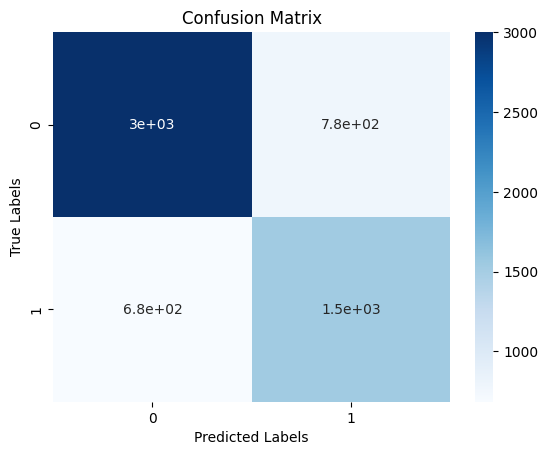

In [15]:
# Make predictions on the testing data
y_pred = model.predict(X_test)
#Classification Report
print("Classification Report (Default Threshold):")
print(classification_report(y_test, y_pred))
# Plot the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [1]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid for the grid search
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 500]
}

# Create an instance of the XGBClassifier
model = XGBClassifier()

# Create an instance of GridSearchCV with the XGBClassifier model and parameter grid
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

# Perform the grid search on the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score from the grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Get the best model
best_model_XGB= grid_search.best_estimator_

# Calculate the training accuracy of the best model
train_accuracy = best_model_XGB.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calculate the testing accuracy of the best model
test_accuracy = best_model_XGB.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)